<a href="https://colab.research.google.com/github/KarelZe/adv-ml/blob/main/AML_Bonus_MarkusBilz_2327197_VerenaHollinger_2055134.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style="whitegrid")
palette="ch:rot=-.25,hue=1,light=.75"

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Task 1: Explain dataset and business problems in two paragraphs. (10 points)
...

## Loading the data

In [ ]:
import pandas as pd
from google.colab import drive


drive.mount("/content/drive")

data = pd.read_csv('/content/drive/My Drive/data/accepted_2007_to_2018Q4.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [3]:
import pandas as pd
from google.colab import drive

drive.mount("/content/drive")

data = pd.read_csv('/content/drive/My Drive/AdvancedML/accepted_2007_to_2018Q4.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Task 2: Do an explanatory analysis for this dataset. (10 points)

In [4]:
data.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
...,...,...,...,...,...
settlement_status,NaN,NaN,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN,NaN,NaN


In [5]:
a_priori_known = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',  'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',  'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint']

data = data[a_priori_known]

In [6]:
threshold = 0.80

percentage_missing_val = data.isna().sum()/len(data)
percentage_missing_val = percentage_missing_val[percentage_missing_val >= threshold]

print(percentage_missing_val)
threshold_abs = int(threshold * len(data))

data = data.dropna(axis=1, thresh=threshold_abs)

print(data.shape)

mths_since_last_record       0.841131
annual_inc_joint             0.946605
dti_joint                    0.946607
verification_status_joint    0.948808
revol_bal_joint              0.952218
dtype: float64
(2260701, 75)


In [7]:
data = data[data.loan_amnt.notna()]

Hier hatte ich noch verification status und id ergänzt und purpose, emp_length und term zu den categorical gemacht
addr_state hätte 51 Klassen, viel für OneHotEncoding, aber können wir es sonst überhaupt verwenden?

In [8]:
# convert to categorical
categorical = ['term', 'application_type', 'initial_list_status', 'loan_status', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose','emp_length']
data[categorical] = data[categorical].apply(lambda x: x.astype('category'))

# convert to string
strs = ['emp_title', 'title', 'zip_code', 'addr_state']
data[strs] = data[strs].apply(lambda x: x.astype('string'))

# convert to datetime
dts = ['earliest_cr_line', 'issue_d', 'last_credit_pull_d']
data[dts] = data[dts].apply(lambda x: pd.to_datetime(x, format="%b-%Y",  errors='coerce'))

# convert to integer
ints = ['id']
data[ints] = data[ints].apply(lambda x: x.astype('int'))

print(data.dtypes)

id                               int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                          category
                                ...   
tax_liens                      float64
tot_hi_cred_lim                float64
total_bal_ex_mort              float64
total_bc_limit                 float64
total_il_high_credit_limit     float64
Length: 75, dtype: object


##Number of classes per categorical feature

In [9]:
data_classes = []
for row in data.columns.tolist():
    data_classes.append({'column': row, 'count': len(data[row].unique())})
amount = pd.DataFrame(data_classes).sort_values('count')
print(amount)

                 column    count
36          policy_code        1
37     application_type        2
4                  term        2
31  initial_list_status        2
13  verification_status        3
..                  ...      ...
72    total_bal_ex_mort   212778
40          tot_cur_bal   487689
9             emp_title   512695
71      tot_hi_cred_lim   529973
0                    id  2260668

[75 rows x 2 columns]


###The features "purpose" and "title" contain similar content. Since "purpose" only contains 14 classes and "title" contains more than 60,000 classes we keep "purpose" and drop "title"

In [10]:
data = data.drop(columns=['title'])

##Analyze loan status

In [11]:
data['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [12]:
target_list = [1 if i=='Default' or i=='Charged Off' or i=='Does not meet the credit policy. Status:Charged Off' else 0 for i in data['loan_status']]
data['TARGET'] = target_list
data['TARGET'].value_counts()

0    1991308
1     269360
Name: TARGET, dtype: int64

##Analyze effect of joint/ individual application

In [13]:
data['application_type'].value_counts()

Individual    2139958
Joint App      120710
Name: application_type, dtype: int64

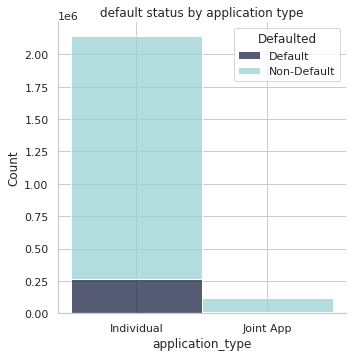

In [14]:
default_categories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
data['default'] = data['loan_status'].isin(default_categories)

g = sns.displot(data, x='application_type', hue='default', multiple='stack', legend=False, palette=palette)
plt.title("default status by application type")
plt.legend(title='Defaulted', loc='upper right', labels=['Default', 'Non-Default'])
plt.show(g);

In [20]:
data_jointapp = data.loc[data['application_type'] == 'Joint App']
data_indidualapp = data.loc[data['application_type'] == 'Individual']

In [22]:
# die Methode ist irgendwo rauskopiert, wenn wir sie drin lassen wollen muss ich sie noch ein bisschen was abändern
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [19]:
miss_values = null_values(data_jointapp)
miss_values.head(20)

Dataframe has 76 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
emp_title,18410,15.3
emp_length,16550,13.7
mo_sin_old_il_acct,4192,3.5
bc_util,2953,2.4
bc_open_to_buy,2890,2.4
percent_bc_gt_75,2890,2.4
dti,1711,1.4
revol_util,250,0.2
avg_cur_bal,10,0.0
last_credit_pull_d,1,0.0


In [21]:
miss_values = null_values(data_indidualapp)
miss_values.head(20)

Dataframe has 76 columns.
There are 50 columns that have missing values.


,Missing Values,% of Total Values
num_tl_120dpd_2m,153656,7.2
emp_title,148559,6.9
mo_sin_old_il_acct,134879,6.3
emp_length,130357,6.1
bc_util,73118,3.4
percent_bc_gt_75,72489,3.4
bc_open_to_buy,72045,3.4
pct_tl_nvr_dlq,70431,3.3
avg_cur_bal,70336,3.3
num_rev_accts,70277,3.3


## Data Preprocessing

Since the features have different units, Scaling and Standardization of the numeric features are necessary. And since a Support Vector Machine required data with values between 0 and 1 the Standardization is conducted first.

In [ ]:
data_num = data.select_dtypes(include=[np.float64, np.float32])
data_num_columns = data_num.columns
data = data.drop(columns=data_num_columns)

standardizer = StandardScaler()
data_standardized = pd.DataFrame(standardizer.fit_transform(data_num), columns = data_num_columns)
data_standardized.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260523e+06,2260668.0,2.260639e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06
mean,-9.057489e-14,-1.872652e-14,-4.596752e-15,1.424838e-14,-1.786075e-15,2.566365e-15,-2.864634e-17,2.311206e-13,-4.096079e-13,-3.479041e-14,-4.965724e-13,-4.207950e-14,-4.174442e-13,-2.784793e-15,-2.281326e-15,-1.104190e-14,4.922601e-15,4.065354e-14,-1.145136e-13,0.0,-3.818407e-14,-1.685858e-14,3.914510e-17,-8.243328e-15,1.780998e-13,4.474034e-16,-7.920905e-15,-1.341550e-15,-7.114296e-14,-4.449326e-15,-4.768742e-15,4.000269e-15,-1.186968e-14,1.683747e-14,-1.534575e-13,1.656184e-13,2.004769e-15,-2.058577e-14,5.567221e-14,-5.884046e-14,6.791501e-14,5.343577e-14,1.155583e-13,-2.129209e-14,7.711787e-14,-1.838991e-14,-1.059663e-13,-1.847065e-13,2.790513e-13,-8.818340e-14,3.330781e-13,9.408882e-14,-3.320885e-13,5.771254e-16,4.367798e-16,-6.112952e-15,5.921426e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.582867e+00,-1.582609e+00,-1.634345e+00,-1.610639e+00,-1.650152e+00,-6.920592e-01,-1.397711e+00,-3.538613e-01,-2.683648e+00,-2.683583e+00,-6.510830e-01,-2.058623e+00,-3.462272e-01,-7.259125e-01,-2.036886e+00,-1.932221e+00,-9.423832e+00,-6.080597e+00,-1.203198e-01,0.0,-5.958271e-02,-2.732087e-02,-8.867377e-01,-9.413386e-01,-1.428991e+00,-8.223709e-01,-6.864208e-01,-2.025645e+00,-8.075977e-02,-1.702743e-02,-2.355426e+00,-1.858469e+00,-7.998646e-01,-9.010609e-01,-8.164819e-01,-3.704353e-01,-1.581346e+00,-1.664109e+00,-1.571530e+00,-1.643416e+00,-1.143268e+00,-1.760600e+00,-1.742115e+00,-1.693658e+00,-2.060255e+00,-2.351456e-02,-5.009599e-02,-1.680352e-01,-1.134399e+00,-1.041535e+01,-1.171718e+00,-3.515880e-01,-1.238859e-01,-9.816493e-01,-1.022274e+00,-1.008137e+00,-9.702492e-01
25%,-7.667840e-01,-7.663636e-01,-7.640542e-01,-7.455974e-01,-7.267070e-01,-2.838821e-01,-4.888978e-01,-3.538613e

In [ ]:
min_max = MinMaxScaler()
data_scaled = pd.DataFrame(min_max.fit_transform(data_standardized), columns = data_num_columns)
data_scaled.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260523e+06,2260668.0,2.260639e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06
mean,3.682767e-01,3.681434e-01,3.755859e-01,3.030697e-01,2.570860e-01,7.090221e-04,1.982420e-02,5.291020e-03,3.769711e-01,3.753746e-01,1.747986e-02,1.149743e-01,2.296835e-03,5.734733e-03,5.641342e-02,1.323574e-01,8.090129e-01,7.994553e-01,9.072900e-04,0.0,2.962816e-04,2.542809e-05,1.428972e-02,3.457395e-03,7.065087e-02,1.414051e-02,1.602253e-02,1.704945e-01,8.464413e-04,4.949416e-05,1.258636e-01,1.808533e-01,2.563819e-02,2.172112e-02,1.654662e-02,8.624279e-03,7.352138e-02,7.818705e-02,6.724202e-02,8.984188e-02,5.291471e-02,9.062113e-02,9.274589e-02,8.581463e-02,1.151300e-01,9.105655e-05,7.034129e-04,1.429960e-03,6.489860e-02,9.411458e-01,4.243513e-01,1.068279e-02,5.502481e-04,1.782428e-02,1.497110e-02,1.478252e-02,2.063808e-02
std,2.326644e-01,2.326181e-01,2.298083e-01,1.881674e-01,1.557954e-01,1.024511e-03,1.418333e-02,1.495225e-02,1.404697e-01,1.398782e-01,2.684737e-02,5.585011e-02,6.633896e-03,7.900035e-03,2.769592e-02,6.850016e-02,8.584757e-02,1.314765e-01,7.540657e-03,0.0,4.972612e-03,9.307206e-04,1.611494e-02,3.672850e-03,4.944108e-02,1.719481e-02,2.334215e-02,8.416806e-02,1.048098e-02,2.906731e-03,5.343561e-02,9.731308e-02,3.205317e-02,2.410617e-02,2.026576e-02,2.328148e-02,4.649293e-02,4.698436e-02,4.278763e-02,5.466779e-02,4.628373e-02,5.147174e-02,5.323753e-02,5.066821e-02,5.588145e-02,3.872348e-03,1.404131e-02,8.509883e-03,5.720971e-02,9.036140e-02,3.621616e-01,3.038442e-02,4.441574e-03,1.815748e-02,1.464491e-02,1.466320e-02,2.127091e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.898734e-01,1.898734e-01,2.000000e-01,1.627726e-01,1.438684e-01,4.181818e-04,1.289000e-02,0.000000e+00,2.765957e-01,2.754237e-01,0.000000e+00,7.920792e-02,0.000000e+00,2.048308e-03,3.530203e-02,8.

All categorical values ar binarized using get_dummies

In [ ]:
data_cat = data.select_dtypes(include=['category'])
data_cat_columns = data_cat.columns
data_cat_columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

In [ ]:
data = data.drop(columns=data_cat_columns)
data_to_encode = data_cat.drop(columns=['loan_status'])
data_encoded = pd.get_dummies(data_to_encode)
data_encoded

KeyError: ignored

If there are only two classes, they have a correlation of 1, so one class can be dropped without loosing any information

In [ ]:
data_encoded = data_encoded.drop(columns=['term_ 60 months', 'initial_list_status_w', 'application_type_Joint App'])
data_encoded

,term_ 36 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,application_type_Individual
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2260695,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2260696,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2260697,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
target = data[['TARGET']]
data = data.drop(columns=['TARGET'])
data = pd.concat([data, data_scaled, data_encoded], axis=1)
data[['Target']] = target
data

,id,emp_title,issue_d,zip_code,addr_state,earliest_cr_line,last_credit_pull_d,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,application_type_Individual,Target
0,68407277.0,leadman,2015-12-01,190xx,PA,2003-08-01,2019-03-01,0.078481,0.078481,0.0900,0.338006,0.068867,0.000500,0.00691,0.000000,0.276596,0.275424,0.030303,0.069307,0.0,0.000952,0.033285,0.068571,0.663529,0.662722,0.0,0.0,0.0,0.000079,0.014532,0.00093,0.06250,0.021607,0.002118,0.109541,0.0,0.0,0.148148,0.127255,0.005484,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,68355089.0,Engineer,2015-12-01,577xx,SD,1999-12-01,2019-03-01,0.612658,0.612658,0.6175,0.260125,0.475450,0.000591,0.01706,0.017241,0.446809,0.444915,0.121212,0.217822,0.0,0.007391,0.021517,0.211429,0.822353,0.822485,0.0,0.0,0.0,0.000000,0.020498,0.01118,0.06250,0.010159,0.081320,0.079800,0.0,0.0,0.113113,0.191383,0.003656,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,68341763.0,truck driver,2015-12-01,605xx,IL,2000-08-01,2019-03-01,0.493671,0.493671,0.5000,0.213006,0.249420,0.000573,0.01178,0.000000,0.361702,0.360169,0.000000,0.059406,0.0,0.002709,0.062983,0.097143,0.828235,0.828402,0.0,0.0,0.0,0.000000,0.019024,0.00140,0.09375,0.033000,0.003849,0.164605,0.0,0.0,0.125125,0.183367,0.025594,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,66310712.0,Information Systems Officer,2015-12-01,076xx,NJ,2008-09-01,2019-03-01,0.873418,0.873418,0.8750,0.371495,0.481060,0.001000,0.01806,0.000000,0.744681,0.741525,0.000000,0.128713,0.0,0.002686,0.013000,0.091429,0.798824,0.798817,0.0,0.0,0.0,0.000000,0.030236,0.00673,0.03125,0.024207,0.077287,0.035630,0.0,0.0,0.036036,0.086172,0.003656,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,68476807.0,Contract Specialist,2015-12-01,174xx,PA,1998-06-01,2018-03-01,0.250633,0.250633,0.2600,0.667445,0.166179,0.000949,0.02637,0.017241,0.361702,0.360169,0.090909,0.118812,0.0,0.007549,0.072285,0.194286,0.828235,0.828402,0.0,0.0,0.0,0.000000,0.033267,0.00340,0.15625,0.028853,0.006422,0.228210,0.0,0.0,0.128128,0.209419,0.007313,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
#data_to_encode = data[['term', 'verification_status','application_type']]
#enc = OneHotEncoder()
#df_num = enc.fit_transform(data_to_encode).toarray()
#df_num = pd.DataFrame(df_num)
#df_num

Split the data in test and training data

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The data is very imbalanced. Therefore further preprocessing is required

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

NameError: ignored

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

ValueError: ignored

To identify similar features and relevant features (high correlation with target feature) a correlation analysis is conducted

In [ ]:
#correlation with target feature
corr = data.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n',corr.tail(15))
print('\nMost Negative Correlations:\n',corr.head(15))

## Task 3: Use LASSO for variable selection and explain results. (15 points)

## Task 4: Use logistic regression (in-sample) for default prediction. Interpret your results for logistic regression. (20 points)

## Task 5: Compare logistic regression, classification tree, random forest, bagging, support vector machine (with two kernel functions), and neural network for default prediction based on the out-of-sample performance measures (at least three different measures). (35 points)

## Task 6: Which model do you suggest to the peer-to-peer company? Why? (10 points)